In [5]:
pip install pydub

In [6]:
from pydub.utils import mediainfo
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
filename = "/content/srinidhi 5 word sample.mp4"
audio_sample = mediainfo(filename)
sample_rate = int(audio_sample['sample_rate'])
y, sr = librosa.load(filename, sr=sample_rate)
duration = librosa.get_duration(y=y, sr=sr)
print(f"Sample rate of the audio file: {sample_rate} Hz")
print(f"The duration of the audio file is {duration:.2f} seconds.")

<ipython-input-6-f715508a7b18>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=sample_rate)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Sample rate of the audio file: 48000 Hz
The duration of the audio file is 3.05 seconds.


<ipython-input-7-a0a1a42f09f1>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=sample_rate)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


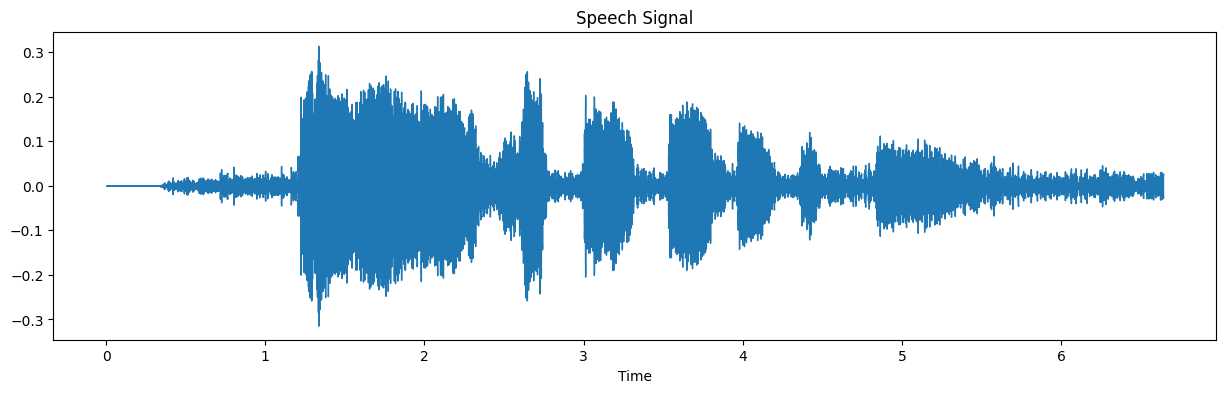

In [7]:
from IPython.display import Audio
y, sr = librosa.load(filename, sr=sample_rate)
plt.figure(figsize=(15, 4))
plt.title('Speech Signal')
librosa.display.waveshow(y)
audio_player = Audio(y, rate=sr)
audio_player

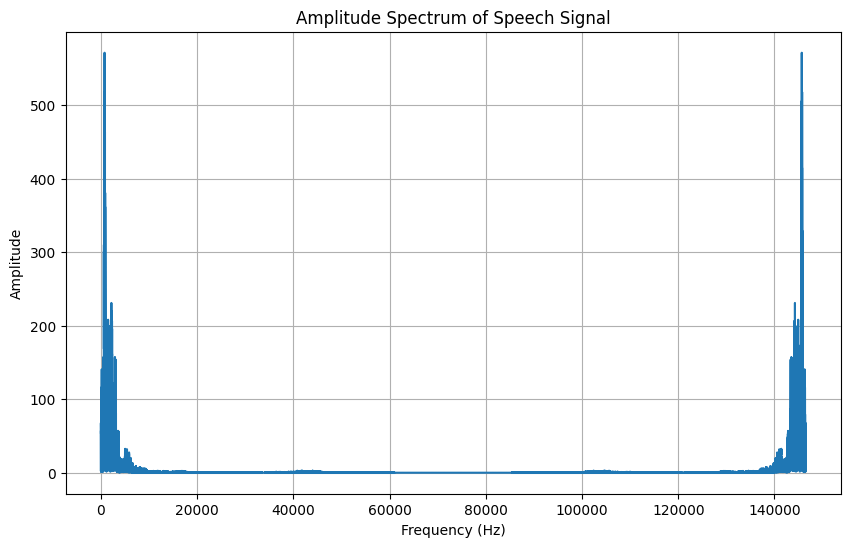

In [8]:
spectral_domain = np.fft.fft(y)

# Compute amplitude spectrum
amplitude_spectrum = np.abs(spectral_domain)

# Plot the amplitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

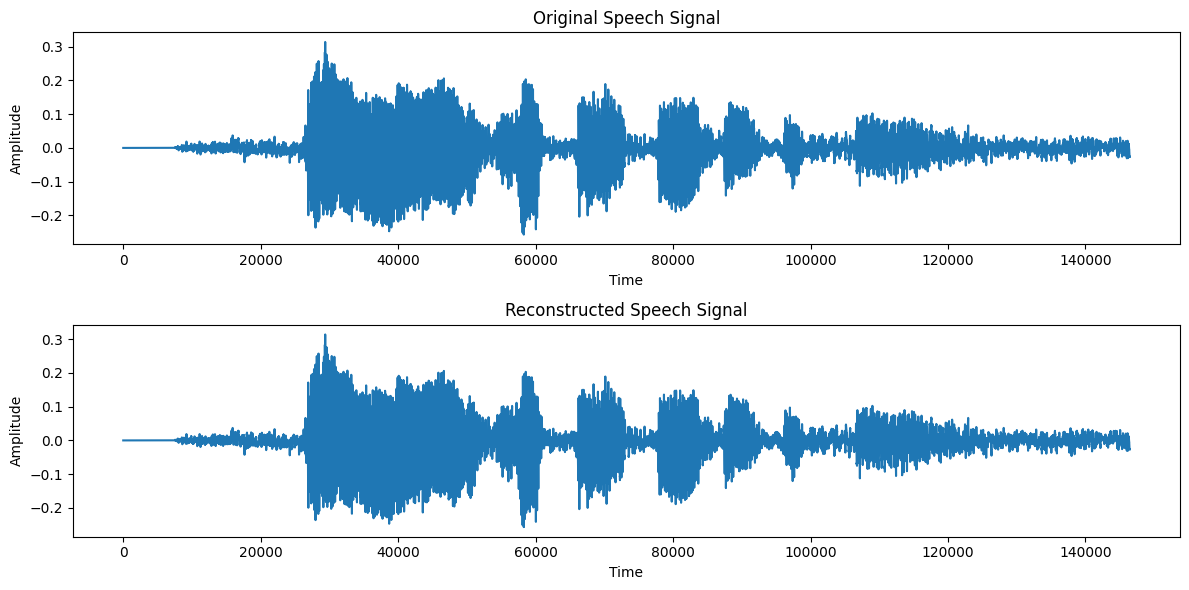

In [9]:
recn_time_domain = np.fft.ifft(spectral_domain)

# Plot original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(recn_time_domain.real)  # Take the real part as ifft may have small imaginary components
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

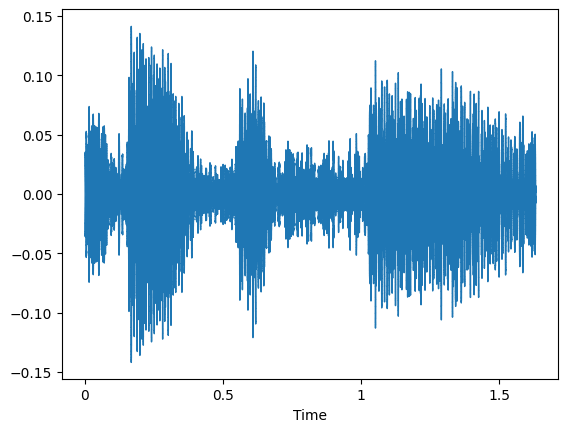

In [10]:
start = 1.75
end = 2.5
segment = y[int(start*sr):int(end*sr)]
librosa.display.waveshow(segment)

audio_player = Audio(segment, rate = sr)
audio_player


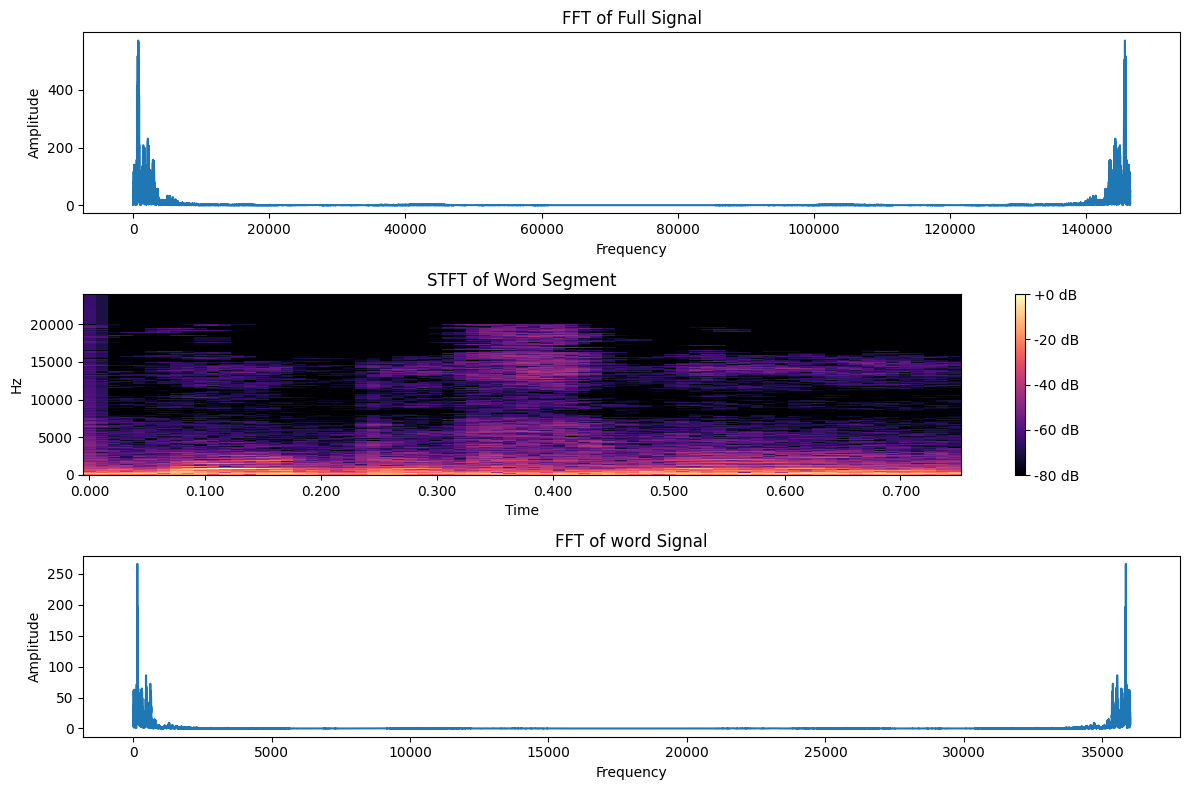

In [11]:
full_fft = np.fft.fft(y)

# Compute the STFT of the word segment
word_stft = librosa.stft(segment)

word_fft = np.fft.fft(segment)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot FFT of the full signal
plt.subplot(3, 1, 1)
plt.plot(np.abs(full_fft))
plt.title('FFT of Full Signal')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

# Plot STFT of the word segment
plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(word_stft), ref=np.max), sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT of Word Segment')

plt.subplot(3, 1, 3)
plt.plot(np.abs(word_fft))
plt.title('FFT of word Signal')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

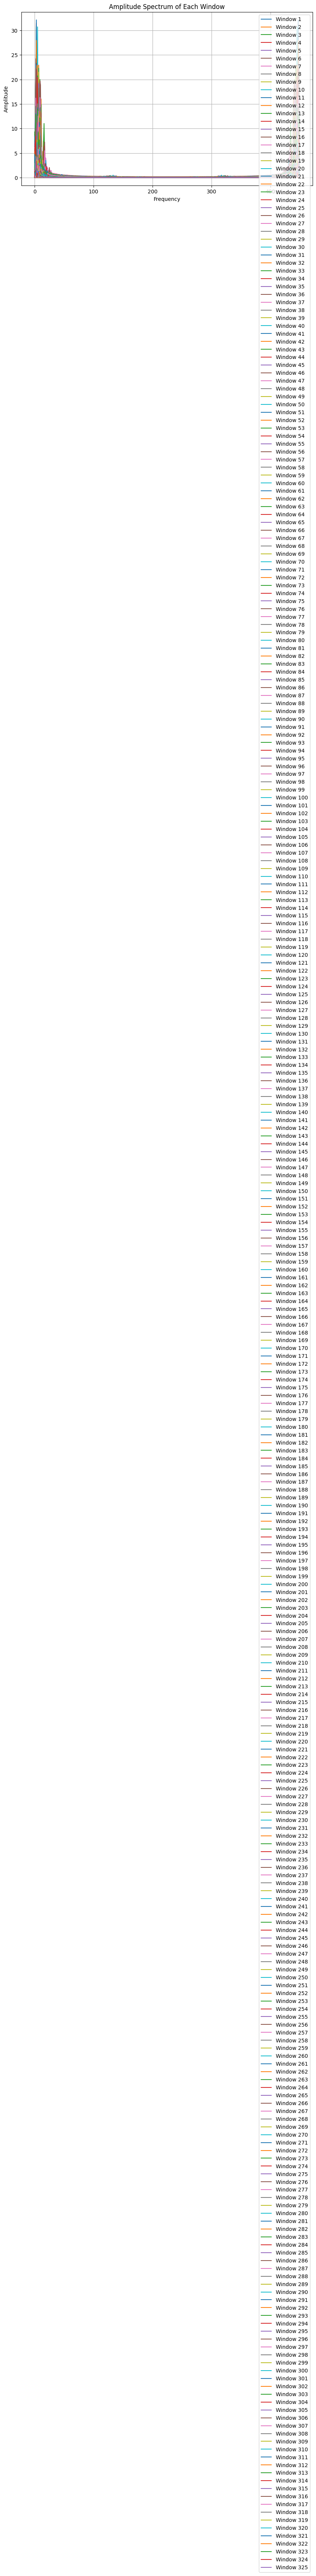

In [22]:
sample_rate = 22.5e3
# Define window duration and sampling rate
window_duration = 20e-3  # 20 milliseconds
window_samples = int(window_duration * sample_rate)

# Calculate the number of windows
num_windows = len(y) // window_samples

# Initialize an array to store the spectral components of each window
spectral_components = []

# Iterate over each window
for i in range(num_windows):
    # Calculate start and end indices of the current window
    start_index = i * window_samples
    end_index = (i + 1) * window_samples

    # Extract the windowed segment
    windowed_segment = y[start_index:end_index]

    # Perform FFT analysis on the windowed segment
    windowed_fft = np.fft.fft(windowed_segment)

    # Append the FFT result to the list of spectral components
    spectral_components.append(windowed_fft)

# Plot the amplitude spectrum of each window
plt.figure(figsize=(10, 6))
for i in range(num_windows):
    plt.plot(np.abs(spectral_components[i]), label=f'Window {i+1}')

plt.title('Amplitude Spectrum of Each Window')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()



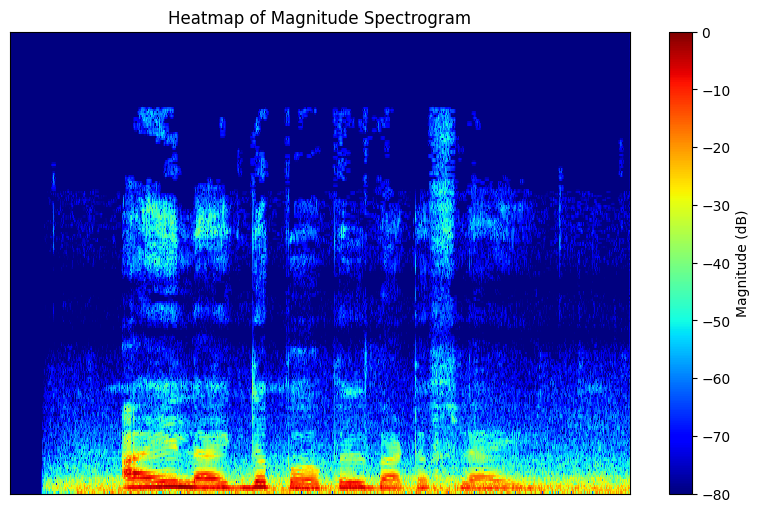

In [31]:

import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Define window duration and sampling rate
window_duration = 20e-3  # 20 milliseconds
window_samples = int(window_duration * sample_rate)

# Compute STFT using librosa.stft()
stft_matrix = librosa.stft(y, n_fft=window_samples)

# Convert STFT matrix to magnitude spectrogram
magnitude_spectrogram = np.abs(stft_matrix)

# Plot the magnitude spectrogram using a heatmap
plt.figure(figsize=(10, 6))
plt.title('Heatmap of Magnitude Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency Bin')
librosa.display.specshow(librosa.amplitude_to_db(magnitude_spectrogram, ref=np.max), sr=sample_rate, hop_length=window_samples, cmap='jet')
plt.colorbar(label='Magnitude (dB)')
plt.show()


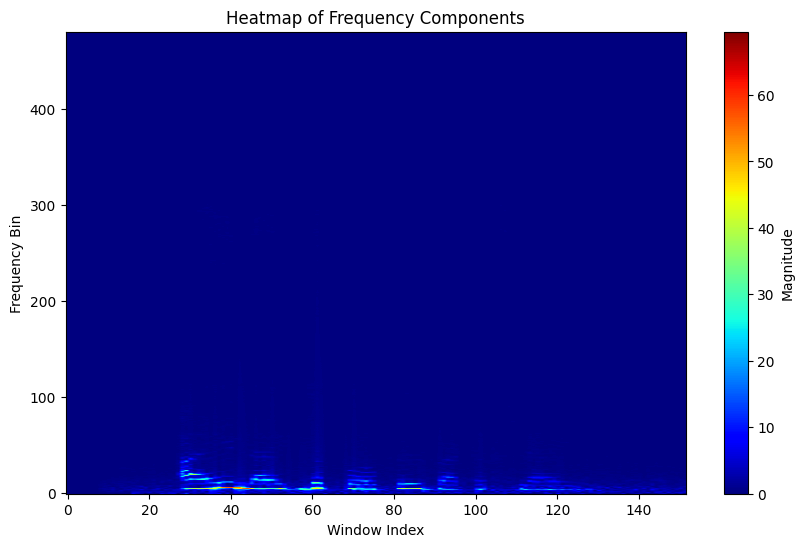

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Define window duration and sampling rate
window_duration = 20e-3  # 20 milliseconds
window_samples = int(window_duration * sr)  # Assuming 'sr' is defined as the sampling rate

# Calculate the number of windows
num_windows = len(y) // window_samples

# Initialize an empty list to store frequency components of each window
frequency_components = []

# Iterate over each window
for i in range(num_windows):
    # Calculate start and end indices of the current window
    start_index = i * window_samples
    end_index = (i + 1) * window_samples

    # Extract the windowed segment
    windowed_segment = y[start_index:end_index]

    # Compute the FFT using numpy.fft.rfft()
    window_fft = np.fft.rfft(windowed_segment)

    # Append the FFT result to the list of frequency components
    frequency_components.append(window_fft)

# Stack frequency components as columns in a matrix
frequency_matrix = np.column_stack(frequency_components)

# Plot the heatmap of the frequency matrix
plt.figure(figsize=(10, 6))
plt.title('Heatmap of Frequency Components')
plt.xlabel('Window Index')
plt.ylabel('Frequency Bin')
plt.imshow(np.abs(frequency_matrix), aspect='auto', origin='lower', cmap='jet')
plt.colorbar(label='Magnitude')
plt.show()


<ipython-input-32-f3a8a5c66fc0>:14: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')


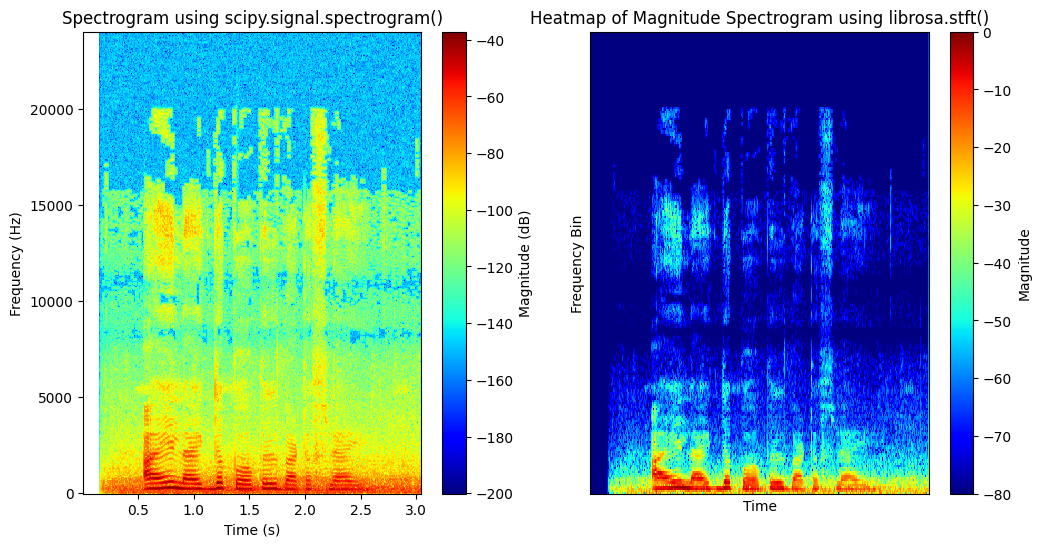

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Define window duration and sampling rate
window_duration = 20e-3  # 20 milliseconds
window_samples = int(window_duration * sr)  # Assuming 'sr' is defined as the sampling rate

# Compute spectrogram using scipy.signal.spectrogram()
frequencies, times, Sxx = spectrogram(y, fs=sr, window='hann', nperseg=window_samples, noverlap=window_samples//2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
plt.title('Spectrogram using scipy.signal.spectrogram()')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude (dB)')

# Plot the heatmap of frequency components using numpy.fft.rfft()
plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(magnitude_spectrogram, ref=np.max), sr=sample_rate, hop_length=window_samples, cmap='jet')
plt.title('Heatmap of Magnitude Spectrogram using librosa.stft()')
plt.xlabel('Time')
plt.ylabel('Frequency Bin')
plt.colorbar(label='Magnitude')
